# House Prices 2.0

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
house_train = pd.read_csv("train.csv")
house_test = pd.read_csv("test.csv")

In [3]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
house_train.shape

(1460, 81)

In [6]:
house_test.shape

(1459, 80)

In [7]:
y = house_train[["SalePrice"]]

In [8]:
house_train = house_train.drop(["SalePrice"],axis=1)

In [9]:
house_train.shape

(1460, 80)

In [10]:
house_train_copy = house_train.copy()
house_test_copy = house_train.copy()

In [11]:
house_full = pd.concat([house_train,house_test],axis=0)

In [12]:
house_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [13]:
house_full.shape

(2919, 80)

In [14]:
house_full_copy = house_full.copy()

### Removing Redundant features

In [15]:
house_full_copy = house_full_copy.drop(["GarageYrBlt","GarageCars"],axis=1)

### Removing Null Values

In [16]:
house_full_copy.shape

(2919, 78)

In [17]:
house_train_id = house_train[["Id"]]
house_test_id = house_test[["Id"]]
house_full_id = house_full[["Id"]]

In [18]:
house_full_copy = house_full_copy.drop(["Id"],axis=1)

In [19]:
house_full_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [20]:
house_full_copy.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
                 ... 
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageArea          1
GarageQual        159
GarageCond

In [21]:
#Drop those columns with more than 50% null values
house_full_copy = house_full_copy.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1)

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
imp1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [24]:
house_full_copy_2 = house_full_copy[['Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition']]

In [25]:
house_full_copy_2.head()

,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,...,61,0,0,0,0,0,2,2008,WD,Normal
1,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,...,0,0,0,0,0,0,5,2007,WD,Normal
2,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,...,42,0,0,0,0,0,9,2008,WD,Normal
3,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,...,84,0,0,0,0,0,12,2008,WD,Normal


In [26]:
house_full_copy_2.isnull().sum()

Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        1
TotRmsAbvGrd       0
Functional         2
Fireplaces         0
GarageType       157
GarageFinish     159
GarageArea         1
GarageQual       159
GarageCond       159
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
dtype: int64

LotFrontage --> Linear feet of street connected to property (Numeric)

MasVnrArea --> Masonry veneer area in square feet (Numeric)

MasVnrType --> Masonry veneer type (Categorical)

MSZoning --> Identifies the general zoning classification of the sale. (Categorical)

Alley --> Type of alley access to property (Categorical)

Utilities --> Type of utilities available (Categorical)

Exterior1st --> Exterior covering on house (Categorical)

Exterior2nd --> Exterior covering on house (Categorical)

BsmtQual -->  Evaluates the height of the basement (Categorical)

BsmtCond --> Evaluates the general condition of the basement (Categorical)

BsmtExposure --> Refers to walkout or garden level walls (Categorical)

BsmtFinType1 --> Rating of basement finished area (Categorical)

BsmtFinSF1 --> Type 1 finished square feet (Numeric)

BsmtFinType2 --> Rating of basement finished area (if multiple types) (Categorical)

BsmtFinSF2 --> Type 2 finished square feet (Numeric)

BsmtUnfSF --> Unfinished square feet of basement area (Numeric)

TotalBsmtSF --> Total square feet of basement area (Numeric)

Electrical --> Electrical system (Categorical)

BsmtFullBath --> Basement full bathrooms (Binary - Categorical)

BsmtHalfBath --> Basement half bathrooms (Binary - Categorical)

KitchenQual --> Kitchen quality (Categorical)

Functional --> Home functionality (Assume typical unless deductions are warranted) (Categorical)

FireplaceQu --> Number of fireplaces (Catgeorical)

GarageType --> Garage location (Categorical)

GarageFinish --> Interior finish of the garage (Categorical)

GarageArea --> Size of garage in square feet (Numeric)

GarageQual --> Garage quality (Categorical)

GarageCond --> Garage condition (Categorical)

PoolQC --> Pool quality (Categorical)

Fence --> Fence Quality (Categorical)

MiscFeature --> Miscellaneous feature not covered in other categories (Categorical)

SaleType -->  Condition of sale (Categorical)

In [27]:
lot_frontage = house_full_copy[["LotFrontage"]]
masvnr = house_full_copy[["MasVnrArea"]]
bsmt1 = house_full_copy[["BsmtFinSF1"]]
bsmt2 = house_full_copy[["BsmtFinSF2"]]
bsmt3 = house_full_copy[["BsmtUnfSF"]]
bsmt4 = house_full_copy[["TotalBsmtSF"]]
ga = house_full_copy[["GarageArea"]]

In [28]:
num_null = pd.concat([lot_frontage,masvnr,bsmt1,bsmt2,bsmt3,bsmt4,ga],axis=1)

In [29]:
num_null.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GarageArea
0,65.0,196.0,706.0,0.0,150.0,856.0,548.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,460.0
2,68.0,162.0,486.0,0.0,434.0,920.0,608.0
3,60.0,0.0,216.0,0.0,540.0,756.0,642.0
4,84.0,350.0,655.0,0.0,490.0,1145.0,836.0


In [30]:
num_null = imp1.fit_transform(num_null)

In [31]:
num_null

array([[  65.,  196.,  706., ...,  150.,  856.,  548.],
       [  80.,    0.,  978., ...,  284., 1262.,  460.],
       [  68.,  162.,  486., ...,  434.,  920.,  608.],
       ...,
       [ 160.,    0., 1224., ...,    0., 1224.,  576.],
       [  62.,    0.,  337., ...,  575.,  912.,    0.],
       [  74.,   94.,  758., ...,  238.,  996.,  650.]])

In [32]:
num_null = pd.DataFrame(data=num_null,columns=["LotFrontage","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","GarageArea"])

In [33]:
house_full_copy1 = house_full_copy.copy()

In [34]:
house_full_copy = house_full_copy.drop(["LotFrontage","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","GarageArea"],axis=1)

In [35]:
house_full_copy1.shape

(2919, 72)

In [36]:
num_null.shape

(2919, 7)

In [37]:
house_full_copy.shape

(2919, 65)

In [38]:
house_full_copy.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='ob

In [39]:
house_full_copy = house_full_copy.join(num_null)

In [40]:
house_full_copy.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,YrSold,SaleType,SaleCondition,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GarageArea
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2008,WD,Normal,65.0,196.0,706.0,0.0,150.0,856.0,548.0
0,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,2010,WD,Normal,65.0,196.0,706.0,0.0,150.0,856.0,548.0
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,2007,WD,Normal,80.0,0.0,978.0,0.0,284.0,1262.0,460.0
1,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,2010,WD,Normal,80.0,0.0,978.0,0.0,284.0,1262.0,460.0
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2008,WD,Normal,68.0,162.0,486.0,0.0,434.0,920.0,608.0


In [41]:
house_full_copy.shape

(2919, 72)

In [42]:
cat1 = house_full_copy[["MasVnrType"]]
cat2 = house_full_copy[["MSZoning"]]
cat4 = house_full_copy[["Utilities"]]
cat5 = house_full_copy[["Exterior1st"]]
cat6 = house_full_copy[["Exterior2nd"]]                   
cat7 = house_full_copy[["BsmtQual"]]
cat8 = house_full_copy[["BsmtCond"]]
cat9 = house_full_copy[["BsmtExposure"]]
cat10 = house_full_copy[["BsmtFinType1"]]
cat11= house_full_copy[["BsmtFinType2"]]
cat12 = house_full_copy[["Electrical"]]
cat13 = house_full_copy[["BsmtFullBath"]]
cat14 = house_full_copy[["BsmtHalfBath"]]
cat15 = house_full_copy[["KitchenQual"]]

cat17 = house_full_copy[["GarageType"]]
cat18 = house_full_copy[["GarageFinish"]]
cat19 = house_full_copy[["GarageArea"]]
cat20 = house_full_copy[["GarageQual"]]
cat21 = house_full_copy[["GarageCond"]]

cat25 = house_full_copy[["SaleType"]]

In [43]:
cat_null = pd.concat([cat1,cat2,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat17,cat18,cat19,cat20,cat21,cat25],axis=1)

In [44]:
cat_null.head()

,MasVnrType,MSZoning,Utilities,Exterior1st,Exterior2nd,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,SaleType
0,BrkFace,RL,AllPub,VinylSd,VinylSd,Gd,TA,No,GLQ,Unf,SBrkr,1.0,0.0,Gd,Attchd,RFn,548.0,TA,TA,WD
0,None,RH,AllPub,VinylSd,VinylSd,TA,TA,No,Rec,LwQ,SBrkr,0.0,0.0,TA,Attchd,Unf,548.0,TA,TA,WD
1,None,RL,AllPub,MetalSd,MetalSd,Gd,TA,Gd,ALQ,Unf,SBrkr,0.0,1.0,TA,Attchd,RFn,460.0,TA,TA,WD
1,BrkFace,RL,AllPub,Wd Sdng,Wd Sdng,TA,TA,No,ALQ,Unf,SBrkr,0.0,0.0,Gd,Attchd,Unf,460.0,TA,TA,WD
2,BrkFace,RL,AllPub,VinylSd,VinylSd,Gd,TA,Mn,GLQ,Unf,SBrkr,1.0,0.0,Gd,Attchd,RFn,608.0,TA,TA,WD


In [45]:
cat_null = imp2.fit_transform(cat_null)

In [46]:
cat_null

array([['BrkFace', 'RL', 'AllPub', ..., 'TA', 'TA', 'WD'],
       ['None', 'RH', 'AllPub', ..., 'TA', 'TA', 'WD'],
       ['None', 'RL', 'AllPub', ..., 'TA', 'TA', 'WD'],
       ...,
       ['None', 'RL', 'AllPub', ..., 'TA', 'TA', 'WD'],
       ['BrkFace', 'RL', 'AllPub', ..., 'TA', 'TA', 'WD'],
       ['None', 'RL', 'AllPub', ..., 'TA', 'TA', 'WD']], dtype=object)

In [47]:
cat_null = pd.DataFrame(data=cat_null,columns=["MasVnrType","MSZoning","Utilities","Exterior1st","Exterior2nd","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Electrical","BsmtFullBath","BsmtHalfBath","KitchenQual","GarageType","GarageFinish","GarageArea","GarageQual","GarageCond","SaleType"])

In [48]:
cat_null.head()

,MasVnrType,MSZoning,Utilities,Exterior1st,Exterior2nd,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,SaleType
0,BrkFace,RL,AllPub,VinylSd,VinylSd,Gd,TA,No,GLQ,Unf,SBrkr,1,0,Gd,Attchd,RFn,548,TA,TA,WD
1,None,RH,AllPub,VinylSd,VinylSd,TA,TA,No,Rec,LwQ,SBrkr,0,0,TA,Attchd,Unf,548,TA,TA,WD
2,None,RL,AllPub,MetalSd,MetalSd,Gd,TA,Gd,ALQ,Unf,SBrkr,0,1,TA,Attchd,RFn,460,TA,TA,WD
3,BrkFace,RL,AllPub,Wd Sdng,Wd Sdng,TA,TA,No,ALQ,Unf,SBrkr,0,0,Gd,Attchd,Unf,460,TA,TA,WD
4,BrkFace,RL,AllPub,VinylSd,VinylSd,Gd,TA,Mn,GLQ,Unf,SBrkr,1,0,Gd,Attchd,RFn,608,TA,TA,WD


In [49]:
house_full_copy = house_full_copy.drop(["MasVnrType","MSZoning","Utilities","Exterior1st","Exterior2nd","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Electrical","BsmtFullBath","BsmtHalfBath","KitchenQual","GarageType","GarageFinish","GarageArea","GarageQual","GarageCond","SaleType"],axis=1)

In [50]:
house_full_copy = house_full_copy.join(cat_null)

In [51]:
house_full_copy.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,SaleType
0,60,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,1,0,Gd,Attchd,RFn,548,TA,TA,WD
0,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,1,0,Gd,Attchd,RFn,548,TA,TA,WD
1,20,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,0,0,TA,Attchd,Unf,548,TA,TA,WD
1,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,0,0,TA,Attchd,Unf,548,TA,TA,WD
2,60,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,0,1,TA,Attchd,RFn,460,TA,TA,WD


In [52]:
house_full_copy.shape

(2919, 72)

In [53]:
house_full_copy.isnull().sum()

MSSubClass       0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
LotFrontage      0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
MasVnrType       0
MSZoning         0
Utilities        0
Exterior1st      0
Exterior2nd      0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Electrical       0
BsmtFullBath

## One-Hot Encoding

In [54]:
house_full_copy.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,SaleType
0,60,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,1,0,Gd,Attchd,RFn,548,TA,TA,WD
0,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,1,0,Gd,Attchd,RFn,548,TA,TA,WD
1,20,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,0,0,TA,Attchd,Unf,548,TA,TA,WD
1,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,0,0,TA,Attchd,Unf,548,TA,TA,WD
2,60,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,0,1,TA,Attchd,RFn,460,TA,TA,WD


In [55]:
house_full_cat = house_full_copy.select_dtypes("object")

In [56]:
house_full_cat.head()

,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,SaleType
0,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,1,0,Gd,Attchd,RFn,548,TA,TA,WD
0,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,...,SBrkr,1,0,Gd,Attchd,RFn,548,TA,TA,WD
1,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,0,0,TA,Attchd,Unf,548,TA,TA,WD
1,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,...,SBrkr,0,0,TA,Attchd,Unf,548,TA,TA,WD
2,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,0,1,TA,Attchd,RFn,460,TA,TA,WD


In [57]:
house_full_cat.columns

Index(['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'Functional', 'PavedDrive',
       'SaleCondition', 'MasVnrType', 'MSZoning', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'KitchenQual', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'SaleType'],
      dtype='object')

In [58]:
dummies = pd.get_dummies(house_full_cat[['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'Functional', 'PavedDrive',
       'SaleCondition', 'MasVnrType', 'MSZoning', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'KitchenQual', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'SaleType']])

In [59]:
dummies.head()

,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,GarageCond_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,0,1,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [60]:
house_full_copy = house_full_copy.drop(['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'Functional', 'PavedDrive',
       'SaleCondition', 'MasVnrType', 'MSZoning', 'Utilities',
       'Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType'],axis=1)

In [61]:
house_full_copy = pd.concat([house_full_copy,dummies],axis=1)

In [62]:
house_full_copy.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCond_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60,8450,7,5,2003,2003,856,854,0,1710,...,1,0,0,0,0,0,0,0,0,1
0,20,11622,5,6,1961,1961,896,0,0,896,...,1,0,0,0,0,0,0,0,0,1
1,20,9600,6,8,1976,1976,1262,0,0,1262,...,1,0,0,0,0,0,0,0,0,1
1,20,14267,6,6,1958,1958,1329,0,0,1329,...,1,0,0,0,0,0,0,0,0,1
2,60,11250,7,5,2001,2002,920,866,0,1786,...,1,0,0,0,0,0,0,0,0,1


In [63]:
house_full_columns = house_full_copy.columns

In [64]:
house_full_columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       ...
       'GarageCond_TA', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=564)

In [65]:
dummies.shape

(2919, 533)

### Feature Scaling

from sklearn.preprocessing import StandardScaler

#Declaring a scaler object
sc = StandardScaler()

#Fitting the scaler to the data
house_full_copy = sc.fit_transform(house_full_copy) 

house_full_copy = pd.DataFrame(data=house_full_copy,columns = house_full_columns)

house_full_copy.head()

In [66]:
house_full_copy.shape

(2919, 564)

In [67]:
house_full_id.shape

(2919, 1)

In [68]:
y.shape

(1460, 1)

In [69]:
new_house_test = house_full_copy.iloc[1460:]

In [70]:
new_house_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCond_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
730,120,5389,8,5,1995,1996,1616,0,0,1616,...,0,0,0,0,0,0,0,0,0,1
730,90,6845,4,5,1955,1955,1152,0,0,1152,...,0,0,0,0,0,0,0,0,0,1
731,80,9590,7,5,2003,2003,1146,0,0,1146,...,1,0,0,0,0,0,0,0,0,1
731,190,6931,4,5,1955,1955,784,0,0,784,...,1,0,0,0,0,0,0,0,0,1
732,60,11404,7,5,1998,1999,1153,878,0,2031,...,1,0,0,0,0,0,0,0,0,1


In [71]:
new_house_test.shape

(1459, 564)

In [72]:
new_house_train = house_full_copy.iloc[:1460]

In [73]:
new_house_train.shape

(1460, 564)

In [74]:
new_house_train.tail()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCond_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
727,60,7200,6,7,1976,2001,684,714,0,1398,...,1,0,0,0,0,0,0,0,0,1
728,90,11475,5,5,1958,1958,1776,0,0,1776,...,1,0,0,0,0,0,0,0,0,1
728,20,47007,5,7,1959,1996,3820,0,0,3820,...,1,0,0,0,0,0,0,0,0,1
729,30,6240,4,5,1925,1950,848,0,360,1208,...,1,0,0,0,0,0,0,0,0,1
729,90,6012,4,5,1955,1955,1152,0,0,1152,...,1,0,0,0,0,0,0,0,0,1


### Removing Outliers

In [75]:
#First, we need to seperate the data (Because removing outliers ⇔ removing rows, and we don't want to remove rows from test set)


#Second, we will define a function that returns outlier values using percentile() method

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75]) #Get 1st and 3rd quartiles (25% -> 75% of data will be kept)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5) #Get lower bound
    upper_bound = quartile_3 + (iqr * 1.5) #Get upper bound
    return np.where((ys > upper_bound) | (ys < lower_bound)) #Get outlier values

#Third, we will drop the outlier values from the train set

trainWithoutOutliers = new_house_train #We can't change train while running through it

for column in new_house_train:
    outlierValuesList = np.ndarray.tolist(outliers_iqr(new_house_train[column])[0]) #outliers_iqr() returns an array
    
trainWithoutOutliers = new_house_train

In [76]:
print(trainWithoutOutliers == new_house_train)

     MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          True     True         True         True       True          True   
0          True     True         True         True       True          True   
1          True     True         True         True       True          True   
1          True     True         True         True       True          True   
2          True     True         True         True       True          True   
2          True     True         True         True       True          True   
3          True     True         True         True       True          True   
3          True     True         True         True       True          True   
4          True     True         True         True       True          True   
4          True     True         True         True       True          True   
5          True     True         True         True       True          True   
5          True     True         True         True  

### Implementing the Logistic Regression Model

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X = new_house_train

In [79]:
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lm = LinearRegression()

In [83]:
lm.fit(X_train,y_train)
#this means that gradient descent and cost function have already been calculated to draw a best fit line 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
print(lm.intercept_) #to print the intercepts

[-7.32058248e+11]


In [85]:
predictions = lm.predict(X_test)

In [86]:
predictions

array([[ 1.13748432e+05],
       [ 1.67456464e+05],
       [ 1.00390123e+05],
       [ 1.54144973e+05],
       [ 1.52577490e+05],
       [ 1.88521336e+05],
       [ 2.73997185e+05],
       [ 1.48161246e+05],
       [ 1.80100967e+05],
       [ 2.88305801e+05],
       [ 1.38984883e+05],
       [ 2.50173110e+05],
       [ 2.47042616e+05],
       [ 2.23371537e+05],
       [ 2.56956241e+05],
       [ 1.87436393e+05],
       [ 3.13693590e+05],
       [ 1.03989202e+05],
       [ 1.70706692e+05],
       [ 1.69644958e+05],
       [ 5.06101006e+04],
       [ 1.94653621e+05],
       [ 1.57983614e+05],
       [ 8.33749039e+04],
       [ 1.57015667e+05],
       [ 1.67865636e+05],
       [ 1.84961392e+05],
       [ 1.96782884e+05],
       [ 2.36155905e+05],
       [ 8.11152550e+04],
       [ 2.14449329e+05],
       [ 1.95382939e+05],
       [ 2.00538788e+05],
       [ 1.12753692e+05],
       [ 2.30059800e+05],
       [ 1.73545976e+05],
       [ 1.60835481e+05],
       [ 2.81294265e+05],
       [ 1.6

In [87]:
y_test.head()

,SalePrice
1050,176485
432,122500
1267,378500
1076,170000
37,153000


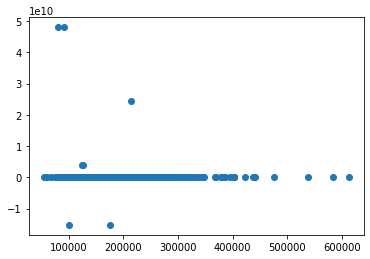

In [88]:
#to visualise
plt.scatter(y_test,predictions)

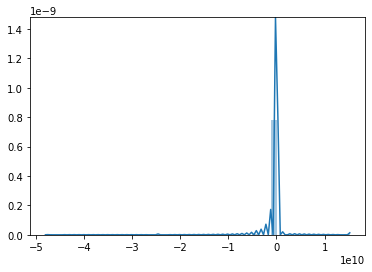

In [89]:
sb.distplot((y_test-predictions))

In [90]:
from sklearn import metrics

In [91]:
#MAE
metrics.mean_absolute_error(y_test,predictions)

362933033.1282134

In [92]:
#MSE
metrics.mean_squared_error(y_test,predictions)

1.30444430250961e+19

In [93]:
#RMSE
np.sqrt(metrics.mean_squared_error(y_test,predictions))

3611709155.6624684

In [94]:
pred = pd.DataFrame(data= predictions,columns =['Predictions'])

In [95]:
pred.head()

,Predictions
0,113748.431641
1,167456.463501
2,100390.123047
3,154144.973022
4,152577.489868


In [96]:
X_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCond_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
525,20,7500,7,5,2005,2005,1266,0,0,1266,...,1,0,0,0,0,0,0,0,0,1
216,20,8450,7,5,2004,2004,1436,0,0,1436,...,1,0,0,0,0,0,0,0,0,1
633,30,5400,7,6,1920,2006,1027,0,0,1027,...,1,0,0,0,0,0,0,0,0,1
538,20,11553,5,5,1968,1968,1159,0,0,1159,...,0,0,0,0,0,0,0,0,0,1
18,20,14122,8,5,2005,2006,1822,0,0,1822,...,1,0,0,0,0,0,0,0,0,1


### Submission

In [97]:
sub_pred = lm.predict(new_house_test)

In [98]:
sub_pred = pd.DataFrame(data=sub_pred,columns=["SalePrice"])

In [99]:
sub_pred.head()

,SalePrice
0,9.225577e+04
1,1.869666e+05
2,1.257408e+05
3,1.934408e+05
4,2.025879e+09


In [100]:
sub_pred = pd.concat([house_test_id,sub_pred],axis=1)

In [101]:
sub_pred.head()

,Id,SalePrice
0,1461,9.225577e+04
1,1462,1.869666e+05
2,1463,1.257408e+05
3,1464,1.934408e+05
4,1465,2.025879e+09


In [102]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

3611709155.6624684

In [103]:
sub_pred.to_csv("submissions.csv",index=False)

# GRADIENT BOOSTING

In [104]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [106]:
model = XGBRegressor(max_depth=80,learning_rate=0.01,n_estimators=1000)

y_pred_val = model.fit(X_train,y_train).predict(X_test)
print('R2 Score On Validation: {}'.format(r2_score(y_test,y_pred_val)))

features = pd.Series(model.feature_importances_, index = X_train.columns)
features = features.sort_values()

[12:32:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score On Validation: -0.28533715546854466


Text(0.5, 1.0, 'Feature Importances in the XGBoost Model For Regression')

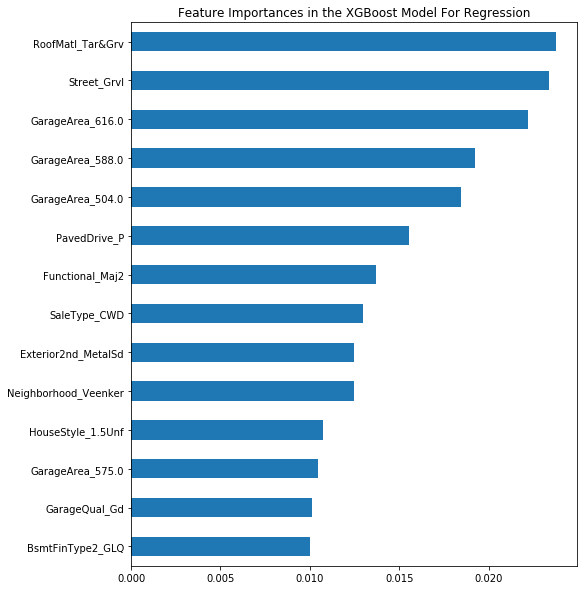

In [107]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
features[features>=0.01].plot(kind = "barh")
plt.title("Feature Importances in the XGBoost Model For Regression")